# Predicting heart disease using machine learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to 
build a machine learning model capable of predicting whether or not someone has hart disease based on their health attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

The original data came from the Cleveland database from UCI Machine Learning Repository.

However, we've downloaded it in a formatted way from Kaggle.

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

## 4. Features

### **Heart Disease Data Dictionary**

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

In [109]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

## Load data

In [6]:
df = pd.read_csv(r"heart-disease.csv")
df.shape

(303, 14)

## EDA

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat it's types?
3. What's missing from the data and how you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add/change/remove to get more out of your data

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Let's find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

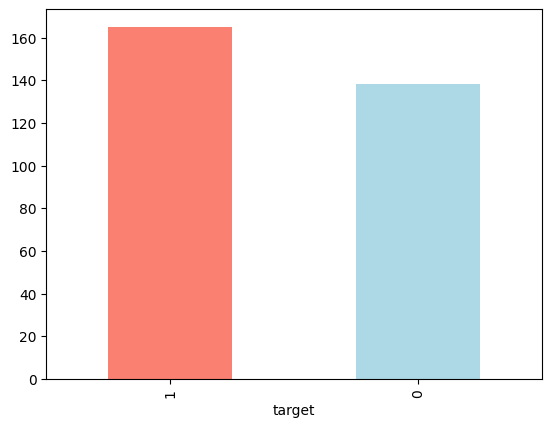

In [10]:
df["target"].value_counts().plot(kind="bar" , color = ["salmon", "lightblue"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Are there any nulls?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease Frequency according to sex

In [14]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
# Compare target with sex
by_sex =pd.crosstab(df.target,df.sex)
by_sex

sex,0,1
target,,
0,24,114
1,72,93


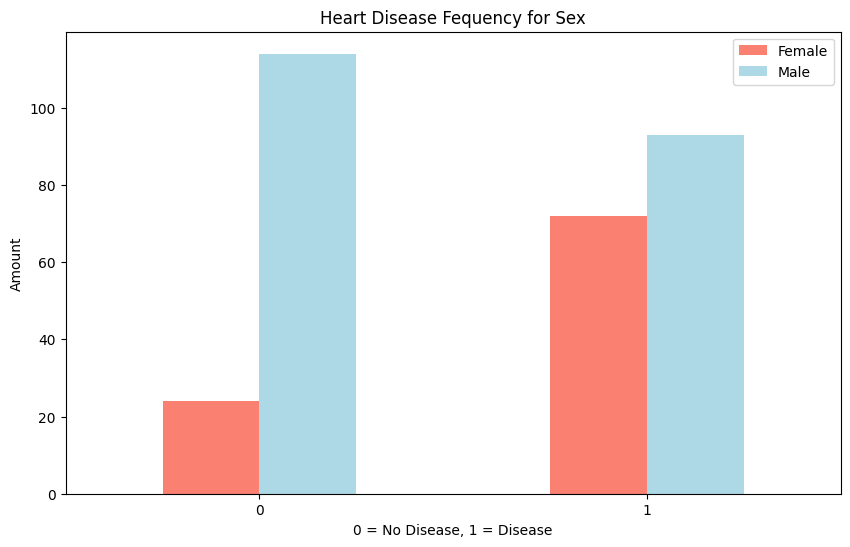

In [16]:
## Create a plot of crosstab
ax = by_sex.plot(kind="bar",
            figsize=(10,6),
            color =["salmon", "lightblue"])
plt.title("Heart Disease Fequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0); 
ax.legend(["Female", "Male"])
plt.show()

## Age VS. Max Heart Rate for Heart Disease

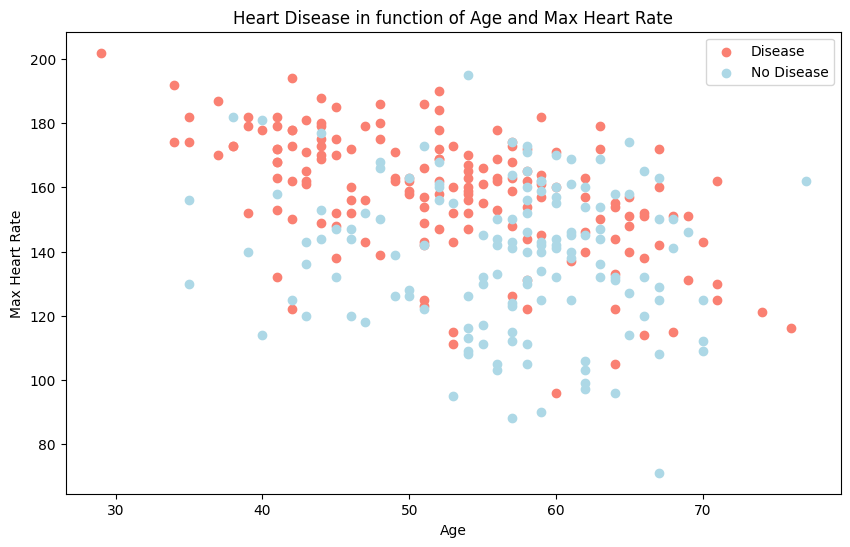

In [17]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c = "salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### We can see some downrate trend but nothing too clear

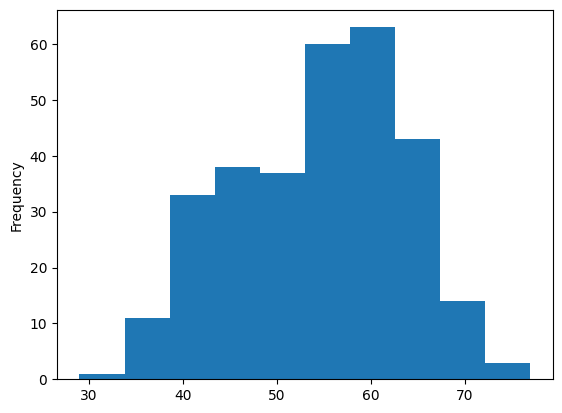

In [18]:
# Check the distributions of our data age
df.age.plot.hist();

### It seems like there aren't any critical outliers 

### Heart Disease Frequency per Chest Pain type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [19]:
by_cp =pd.crosstab(df.cp, df.target)
by_cp

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


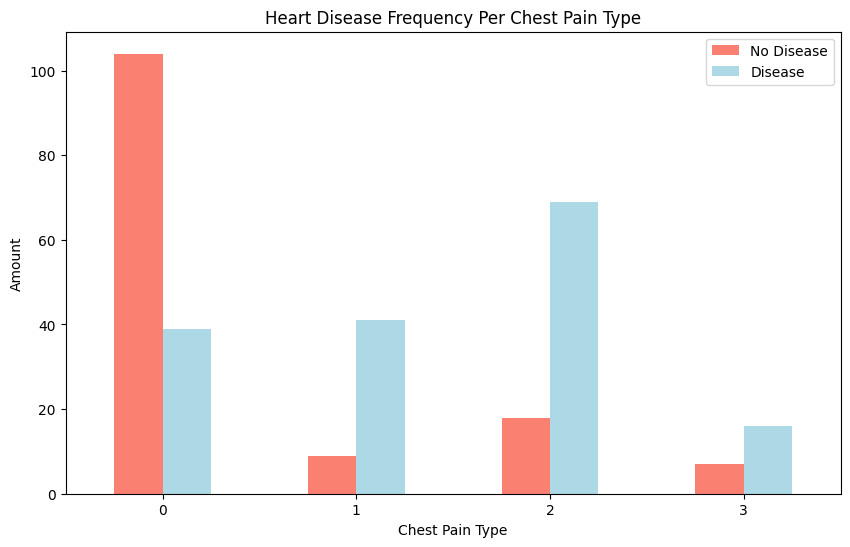

In [20]:
by_cp.plot(kind='bar', 
           figsize=(10,6),
           color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### CP 2 is a bit weird, as it's not heart-related.

In [21]:
# Mak a correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


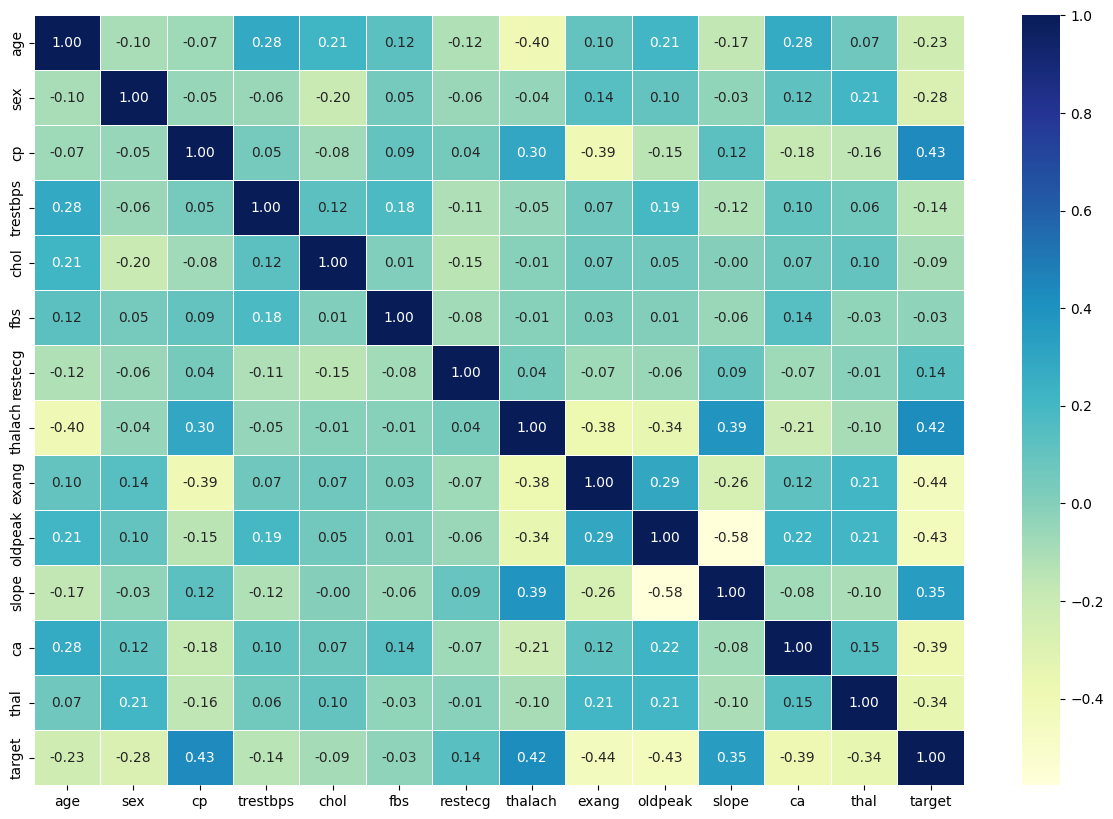

In [22]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modeling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split into X & y

X = df.drop("target",axis=1)
y = df["target"]

In [25]:
# Split into train and test set
np.random.seed(42) # Just to make sure the results are reproducible
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

### Now we've got our sets split into training and test sets, it's time to **build a machine learning model**.

We're going to try 3 different machine learning classifications models:
1. Logistic Regression
2. K-Nearest-Neighbors Classifier
3. Random Forest Classifier

In [26]:
# Put models in a dictionary:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models.
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed:
    np.random.seed(42)
    # Make a dictionary to keep model scores:
    model_scores = {}
    # Loop through models:
    for name, model in models.items():
        # Fit the model to the data:
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores:
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

c:\Users\eliya\miniconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

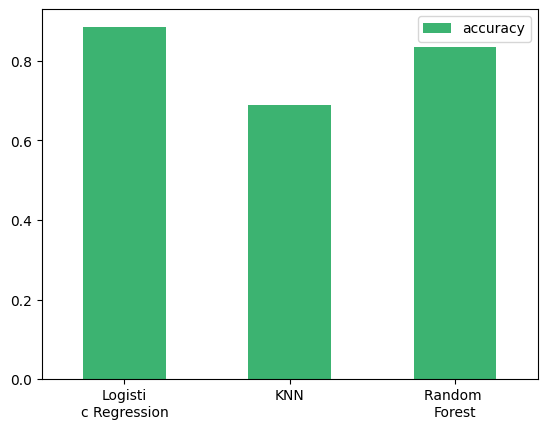

In [58]:
# Model comparison
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
ax = model_compare.T.plot.bar(color='mediumseagreen')
labels = [item.get_text() for item in ax.get_xticklabels()]
max_length = 7
labels = [label if len(label) <= max_length else label[:max_length] + '\n' + label[max_length:] for label in labels]
ax.set_xticklabels(labels, rotation=0)

plt.show()

## Hyperparameters tuning and Cross-Validation

### Let's briefly go through each before we see them in action.

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* **Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* **Recall** - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.
* **Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve** - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* **Area Under Curve (AUC)** - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

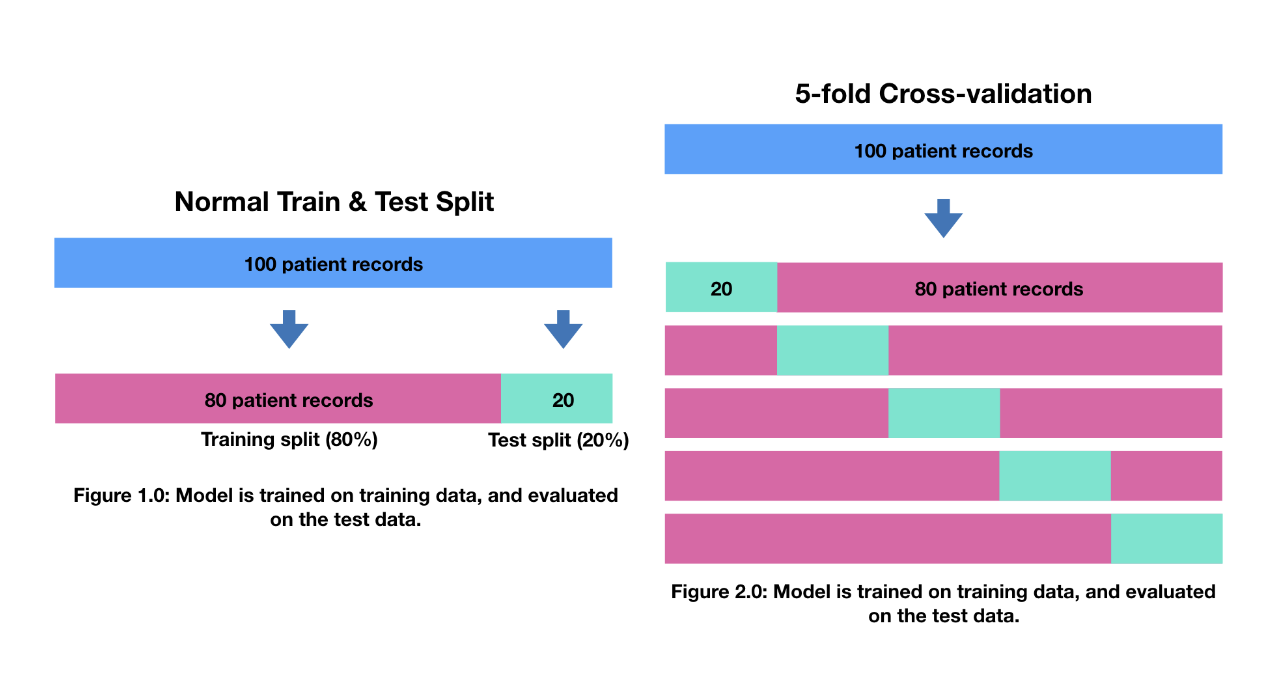


In [61]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))


In [62]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [63]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


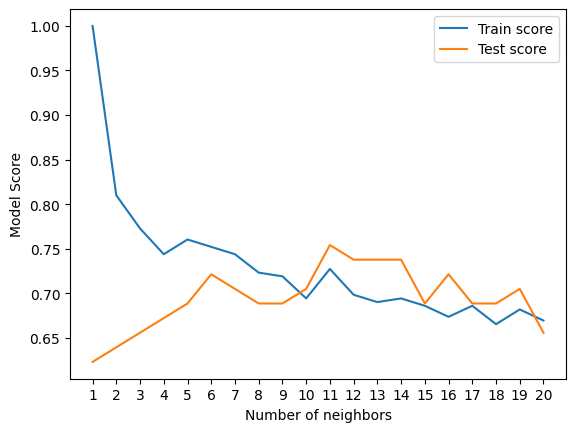

In [66]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Despite extensive Hyperparameter Tuning, the KNN Model fails to Meet the desired performance standards.
### Therefore, exploration of an alternative Model Is Warranted.

### **Tuning models with RandomizedSearchCV**

We're going to tune:

1. LogisticRegression()
2. RandomForestClassifier

In [68]:
# Create Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

In [105]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, sol

In [106]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [75]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned logisticregression(), we'll do the same for RandomForestClassifier()...

In [88]:
# Setup random seed
np.random.seed(42)

# Setup random Hyperparmater search for random forest classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = 2)
                           
# Fit random hyperparameter search model for random forest classifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [86]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [87]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [89]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### OK so now we're pretty sure our LogisticRegression model performs the best so far, being able to predict whether or not someone has heart disease with ~88% accuracy based on their medical attributes.
### Let's use **GridSearchCV** to try and improve our model's accuracy.

In [92]:
# Different Hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [93]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [94]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)             

0.8852459016393442

## Evaluate our Machine Learning Classifier beyond accuracy

* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* **Recall** - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.
* **Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve** - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* **Area Under Curve (AUC)** - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

First let's make predictions

In [114]:
# Make predictins with tuned model
y_preds = gs_log_reg.predict(X_test)

In [115]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [116]:
pd.DataFrame(y_test).T

,179,228,111,246,60,9,119,223,268,33,...,255,63,82,236,204,249,104,300,193,184
target,0,0,1,0,1,1,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0


### ROC curve and AUC scores

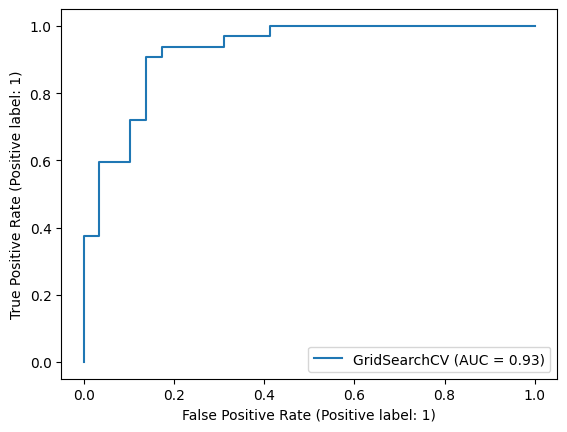

In [125]:
# Let's find FPR and TPR first
glr_disp = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [126]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


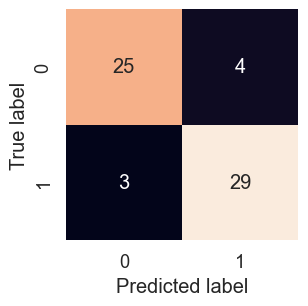

In [145]:
sns.set(font_scale=1.2)

# Plotting the confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),                     
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

### Now we've got a Roc Curve, an AUC metric and a confusion metric.
### Let's get a classification report as well as cross-validated precision, recall and f1 score

In [148]:
# This one id OK but it's *NOT* cross-validated yet
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

we're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [150]:
# Check est hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [151]:
# Create a new classsifier wih best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [159]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc                        

0.8479781420765027

In [160]:
# Cross-validated precision
cv_precision = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision    

0.8215873015873015

In [161]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall    

0.9272727272727274

In [163]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1    

0.8705403543192143

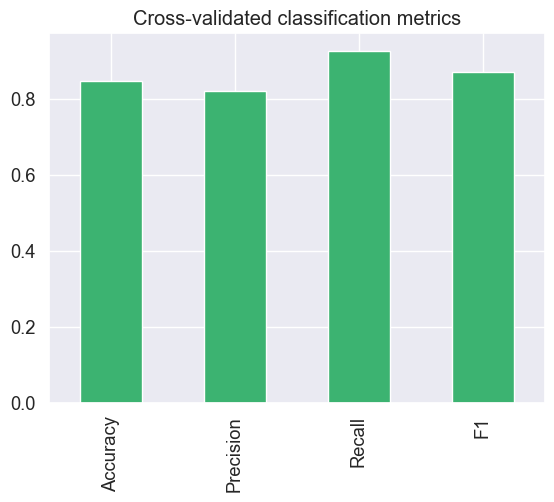

In [177]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                            index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      color="mediumseagreen",
                      legend=False);    

## Feature Importance

Feature Importance iss another ass asking, "Which features contributed the most to our model and how did they contributed?"

It's a different process for each machine learning model - Now we'll do it for **Logistic Regression**

In [178]:
# Fit ann innstannce of LogisticRegressionn
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [179]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044675,  0.66067032, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.5686279 ,
         0.45051633, -0.63609907, -0.67663375]])

In [184]:
# Match the coef's of the features to columns
feature_dict = dict(zip(X_train.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830677295966,
 'sex': -0.8604467464181768,
 'cp': 0.6606703196786501,
 'trestbps': -0.011569931725970527,
 'chol': -0.0016637456109837993,
 'fbs': 0.04386101205953376,
 'restecg': 0.3127586484717099,
 'thalach': 0.024593615841597527,
 'exang': -0.6041309444844618,
 'oldpeak': -0.5686278978594388,
 'slope': 0.45051632904765737,
 'ca': -0.6360990721560912,
 'thal': -0.67663374706138}

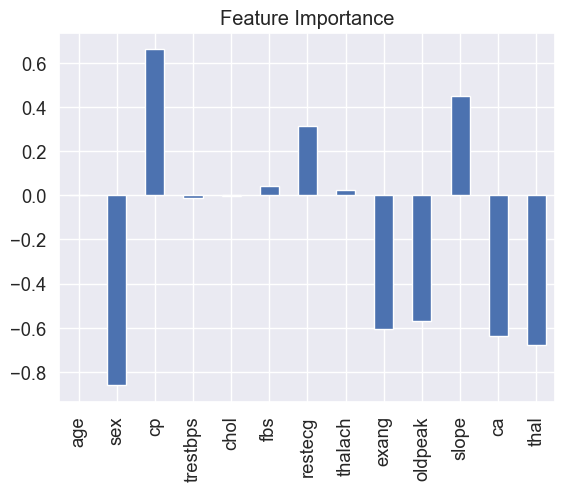

In [185]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

#### We can see there are proolems with sex due to our imbalanced data bubt let's see other features as slope:

In [187]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart

#### This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

## Experimentation

A good next step would be to discuss with your team or research on your own different options of going forward.

1. Could you collect more data?
2. Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.
3. Could you improve the current models (beyond what we've done so far)?